In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (15,6)
from scipy.stats import skew
import pylab as p
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import LabelEncoder
from numpy import NaN
%matplotlib inline
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Asus'

In [2]:
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [4]:
gen=data["GENDER"].value_counts()
gen

M    162
F    147
Name: GENDER, dtype: int64

In [5]:
import plotly
from plotly import graph_objs as go
from plotly import express as px
from plotly import offline

In [6]:
create_pie(gen,"GENDER DISTRIBUTION","GENDER")

NameError: name 'create_pie' is not defined

Patients with Lung Cancer mean age 62.95185185185185
Patients without Lung Cancer mean age 60.743589743589745


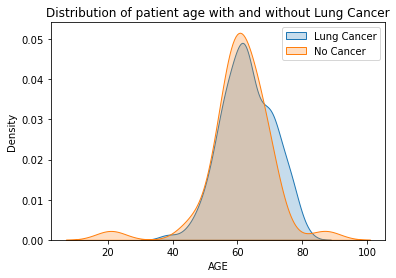

In [7]:
import seaborn as sns
data_cancer = data[data['LUNG_CANCER']=='YES']
data_no_cancer = data[data['LUNG_CANCER']=='NO']

sns.kdeplot(data=data_cancer['AGE'], shade=True, label='Lung Cancer')
sns.kdeplot(data=data_no_cancer['AGE'], shade=True, label ='No Cancer')
plt.legend()
plt.title('Distribution of patient age with and without Lung Cancer')

print("Patients with Lung Cancer mean age", data_cancer['AGE'].mean())
print('Patients without Lung Cancer mean age', data_no_cancer['AGE'].mean())

In [ ]:
#observation:It looks like patients with lung cancer are slightly skewed to be older based off assumptions made looking at the graph and comparing the means between the two groups.

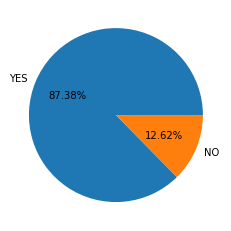

In [8]:
plt.pie(data['LUNG_CANCER'].value_counts(),labels=data['LUNG_CANCER'].unique(),autopct='%1.2f%%')
plt.show()

In [ ]:
#Look at different group's relationships

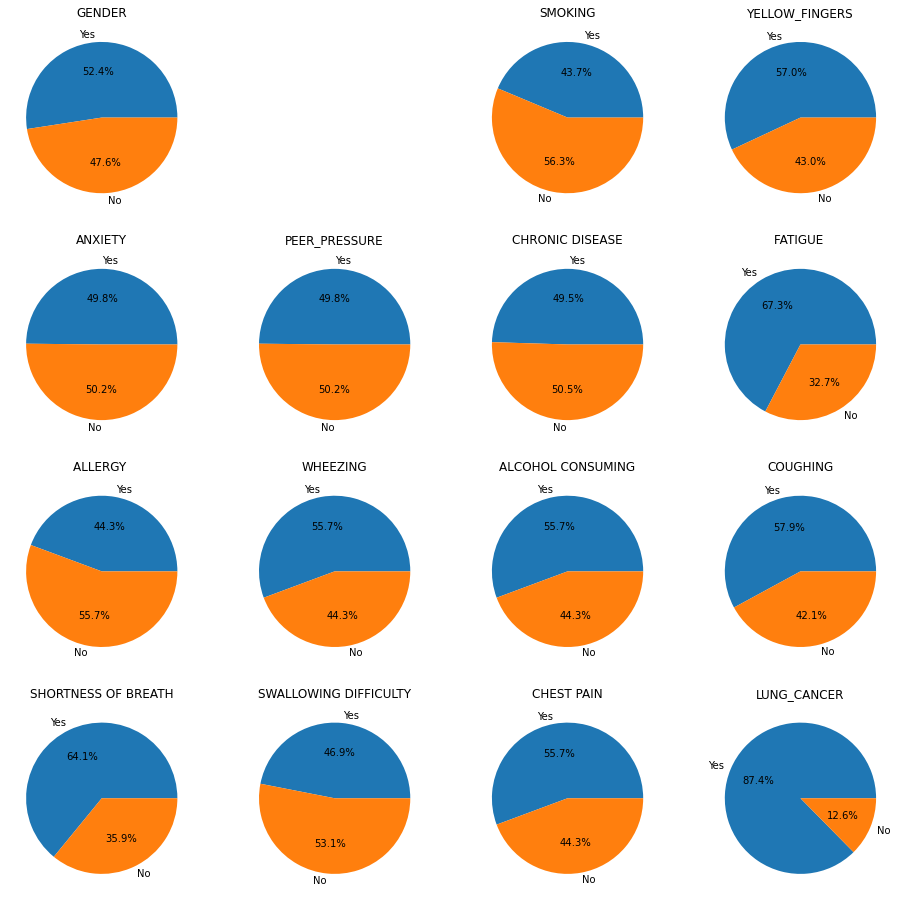

In [9]:
plt.figure(figsize=(16,16))
for i in range(0,len(data.columns)):
    if i==1:
        continue
    else:
        plt.subplot(4,4,i+1)
        plt.title("{0}".format(data.columns[i]))
        plt.pie(data.iloc[:,i].value_counts(sort=False),labels=['Yes','No'],autopct='%.1f%%')

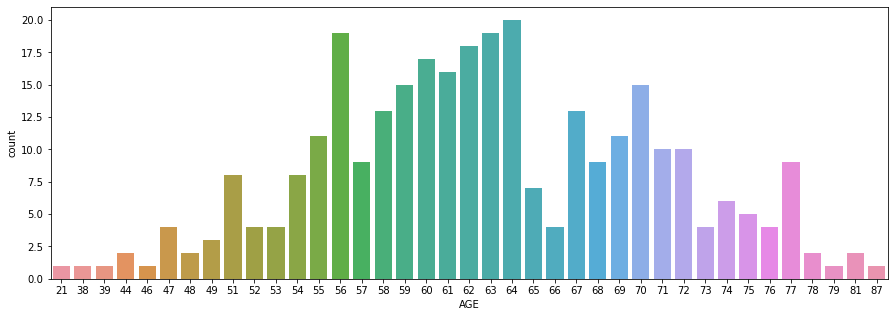

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='AGE',data=data)
plt.show()

In [11]:
data['LUNG_CANCER'].replace(['YES','NO'],[1,0],inplace=True)
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [12]:
#data['LUNG_CANCER'].replace(['NO'],['0'],inplace=True)

In [13]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='ANXIETY'>

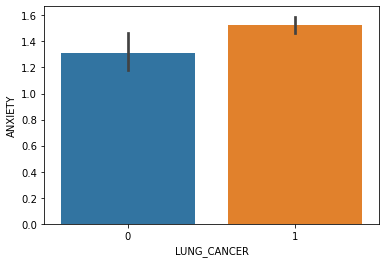

In [14]:
sns.barplot(data=data,x='LUNG_CANCER',y='ANXIETY')

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='ALCOHOL CONSUMING'>

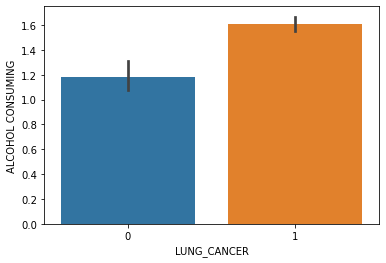

In [15]:
sns.barplot(data=data,x='LUNG_CANCER',y='ALCOHOL CONSUMING')

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='CHEST PAIN'>

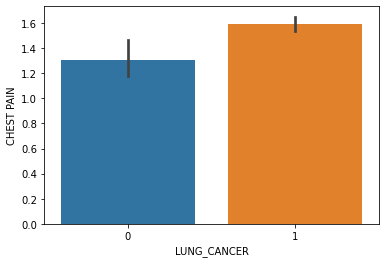

In [16]:
sns.barplot(data=data,x='LUNG_CANCER',y='CHEST PAIN')

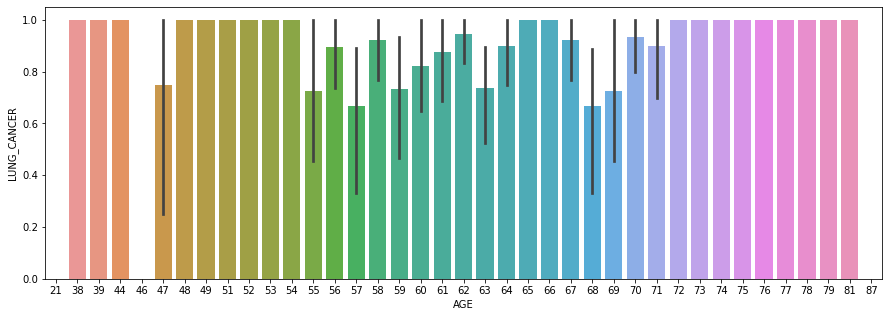

In [17]:
plt.figure(figsize=(15,5))
#sns.barplot(data=data,x='AGE',y='LUNG_CANCER')
sns.barplot(data['AGE'],data['LUNG_CANCER'])
plt.show()

<AxesSubplot:xlabel='GENDER', ylabel='LUNG_CANCER'>

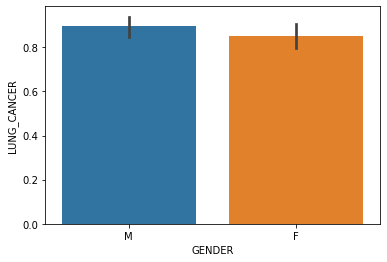

In [18]:
sns.barplot(data=data,x='GENDER',y='LUNG_CANCER')